<a href="https://colab.research.google.com/github/suhani-malik/Stock-Prediction-LSTM/blob/main/Stockcast_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

workbook = gc.open_by_key('1CAUr5wAQRprvLhT8V8BH3syiFeKdtYKvK_QycPI-OVo')

In [ ]:
def select_company(comp_name):

    # Form datasets for required company

    # Reliance
    if comp_name.lower() == "reliance":
        reliance = workbook.worksheet('Reliance') #giving the sheet specified name in the google sheets
        rows = reliance.get_all_values()

    # State Bank of India
    elif comp_name.lower() == "state bank of india":
        sbi = workbook.worksheet('SBI') #giving the sheet specified name in the google sheets
        rows = sbi.get_all_values()

    # Yes Bank
    elif comp_name.lower() == "yes bank":
        yesbank = workbook.worksheet('Yesbank')
        rows = yesbank.get_all_values()

    # Tata Motors
    elif comp_name.lower() == "tata motors":
        tatamotors = workbook.worksheet('TataMotors')
        rows = tatamotors.get_all_values()

    # Infosys
    elif comp_name.lower() == "infosys":
        infosys = workbook.worksheet('Infosys')
        rows = infosys.get_all_values()

    # Tata Consultancy Services
    elif comp_name.lower() == "tata consultancy services":
        tcs = workbook.worksheet('TCS')
        rows = tcs.get_all_values()

    # Zomato
    elif comp_name.lower() == "zomato":
        zomato = workbook.worksheet('Zomato')
        rows = zomato.get_all_values()

    # Idea
    elif comp_name.lower() == "idea":
        idea = workbook.worksheet('IDEA')
        rows =  idea.get_all_values()

    # Bharat Heavy Electronics Limited
    elif comp_name.lower() == "bharat heavy electronics limited":
        bhel = workbook.worksheet('BHEL')
        rows =  bhel.get_all_values()

    # Reliance Power
    elif comp_name.lower() == "reliance power":
        rpower = workbook.worksheet('ReliancePower')
        rows =  rpower.get_all_values()

    df = pd.DataFrame.from_records(rows)
    df.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]

    return df

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import plotly.express as px

In [ ]:
compname = input('Enter Company Name: ')

Enter Company Name: infosys


In [ ]:
df = select_company(compname)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,Date,Open,High,Low,Close,Volume
1,1/4/2010 16:00:00,7.01,7.11,7,7.1,1430302
2,1/5/2010 16:00:00,7.08,7.13,7.05,7.12,1022677
3,1/6/2010 16:00:00,7.06,7.07,6.97,7.01,1477712
4,1/7/2010 16:00:00,6.88,6.9,6.78,6.8,2547062


In [ ]:
df_adjusted = df.loc[1:,]
df_adjusted[["Open", "High", "Low", "Close", "Volume"]] = df_adjusted[["Open", "High", "Low", "Close", "Volume"]].apply(pd.to_numeric)
df_adjusted["Date"] = pd.to_datetime(df_adjusted["Date"])

<ipython-input-7-2a85d4304053>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjusted[["Open", "High", "Low", "Close", "Volume"]] = df_adjusted[["Open", "High", "Low", "Close", "Volume"]].apply(pd.to_numeric)
<ipython-input-7-2a85d4304053>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjusted["Date"] = pd.to_datetime(df_adjusted["Date"])


In [ ]:
df = df_adjusted

In [ ]:
#using closing price to train data and dividing it into 80-20 ratio using ceil
close_prices = df["Close"]
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

#preprocessing using minmaxscaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

#getting the training set and testing set separated
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
#prep the testing set
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#lstm network architecture
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
2664/2664 [==============================] - 63s 22ms/step - loss: 2.9757e-04
Epoch 2/3
2664/2664 [==============================] - 59s 22ms/step - loss: 1.4897e-04
Epoch 3/3
2664/2664 [==============================] - 59s 22ms/step - loss: 1.4251e-04


In [ ]:
#evaluation
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

22/22 [==============================] - 1s 18ms/step


0.204496384171137

<ipython-input-14-af831de8f0eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


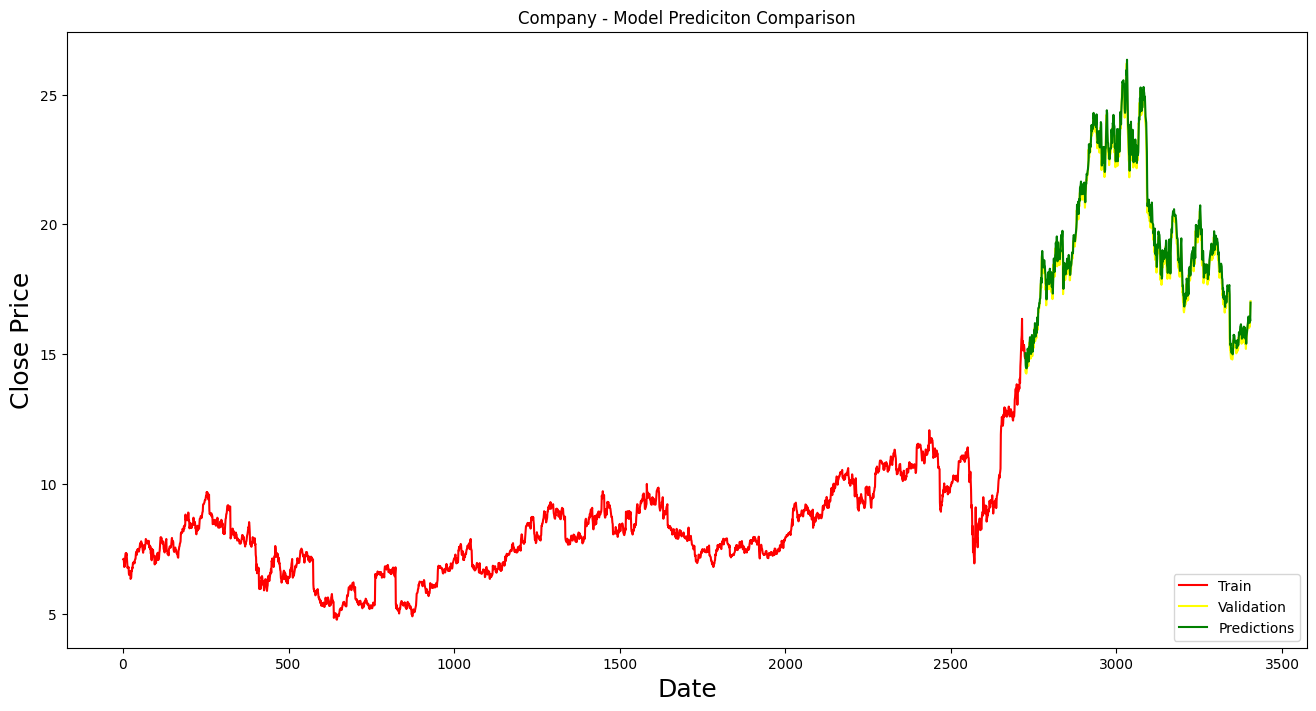

In [ ]:
data= df.filter(['Close'])
train = data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Company - Model Prediciton Comparison')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'] , color='red')
plt.plot(valid['Close'] , color='yellow')
plt.plot(valid['Predictions'] , color='green')
plt.legend(['Train','Validation', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid.tail(15)

,Close,Predictions
3391,15.20,15.658675
3392,15.50,15.402300
3393,15.62,15.693046
3394,15.75,15.828108
3395,15.90,15.953298
3396,16.07,16.097784
3397,16.14,16.264593
3398,16.26,16.333385
3399,16.07,16.449842
3400,16.05,16.262024


In [ ]:
#Prediction for Tomorrow:
#Use last 60 days value as predictor
new_df = df.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(f'Closing Price of {compname} tomorrow:{pred_price}')


1/1 [==============================] - 0s 20ms/step
Opening Price of infosys tomorrow:[[17.254921]]
